In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import re

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [560]:
df = pd.read_csv('final.csv')
ids = df.id
names = df.name
df = df[df.columns[:75]]

In [573]:
mask = (df.dtypes == np.float64) | (df.dtypes == np.int)
df_sub = df.ix[:, mask]
df_sub = df_sub.dropna(axis = 1, thresh = 72)
a = df_sub.apply(lambda s : s.value_counts().get(0,0), axis=0)
a = a[a < 1].index

In [562]:
df_sub = df_sub[a]

In [563]:
pca = PCA(copy=True, n_components=3, whiten=False)
imp = preprocessing.Imputer(axis=0)

X = imp.fit_transform(df_sub)
X_centered = preprocessing.scale(X)
X_pca = pca.fit_transform(X_centered)
print(pca.explained_variance_ratio_)

[ 0.34051848  0.29117271  0.0977645 ]


In [346]:
df_c = pd.DataFrame(pca.components_.T, index = df_sub.columns, columns = [1,2,3])

In [587]:
#df_c['size'] = np.sqrt(df_c[1]**2 + df_c[2]**2 + df_c[3]**2)

In [590]:
#df_c.sort(1, ascending = True)

In [126]:
cols = ['single new condo rent no kids -married owners kids single family homes ', '50s rich big homes - large commute small homes family', 'single 20s30s cheap old small commute - old people widows']

In [363]:
dff = df_sub.fillna(0)

In [583]:
for i in [3,4,5,6,7,8,9]:
    clusterer = KMeans(n_clusters=i)
    cluster_labels = clusterer.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 6 The average silhouette_score is : 0.363291551189


In [404]:
df_pca = pd.DataFrame(X_pca, columns = cols, index = ids)

In [302]:
df_pca.to_csv('pca_zillow.csv', index = False)

In [592]:
def plot_embedding(X, y, name_list, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(20, 20), dpi=250)
    ax = plt.subplot(111, projection='3d')
    #ax.axis('off')
    #ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        ax.text(X[i, 2], X[i, 1],X[i,0], str(name_list[i]), color=plt.cm.Set1(y[i] / 10.), fontsize = 10)

    plt.xticks([]), plt.yticks([])
    ax.set_xlim3d(-0.1, 1.1)
    ax.set_ylim3d(-0.1, 1.1)
    ax.set_zlim3d(-0.1, 1.1)
    if title is not None:
        plt.title(title, fontsize=16)

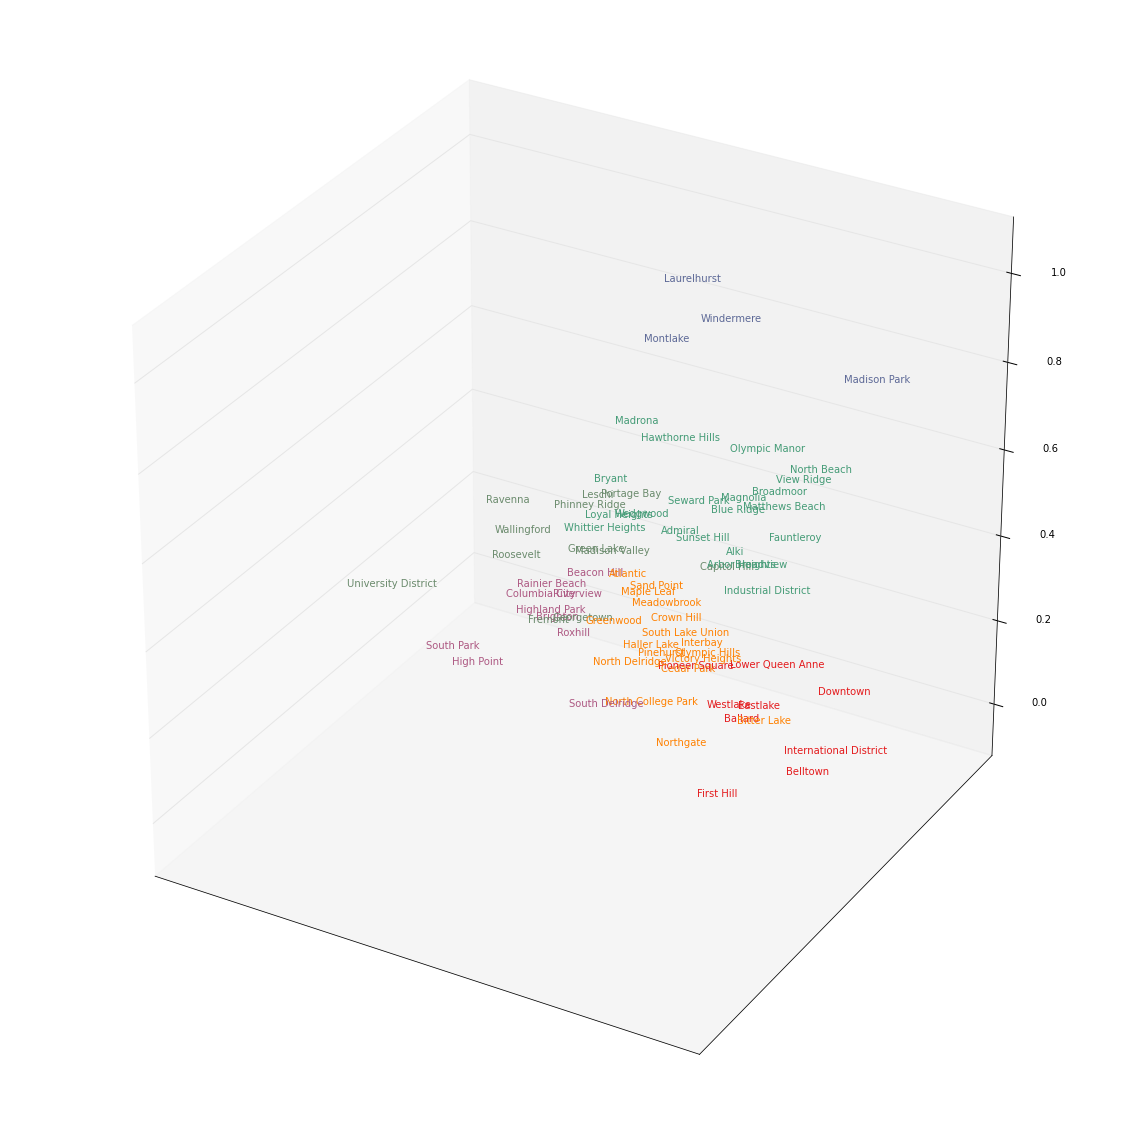

In [593]:
plot_embedding(X_pca, cluster_labels, names)

In [478]:
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

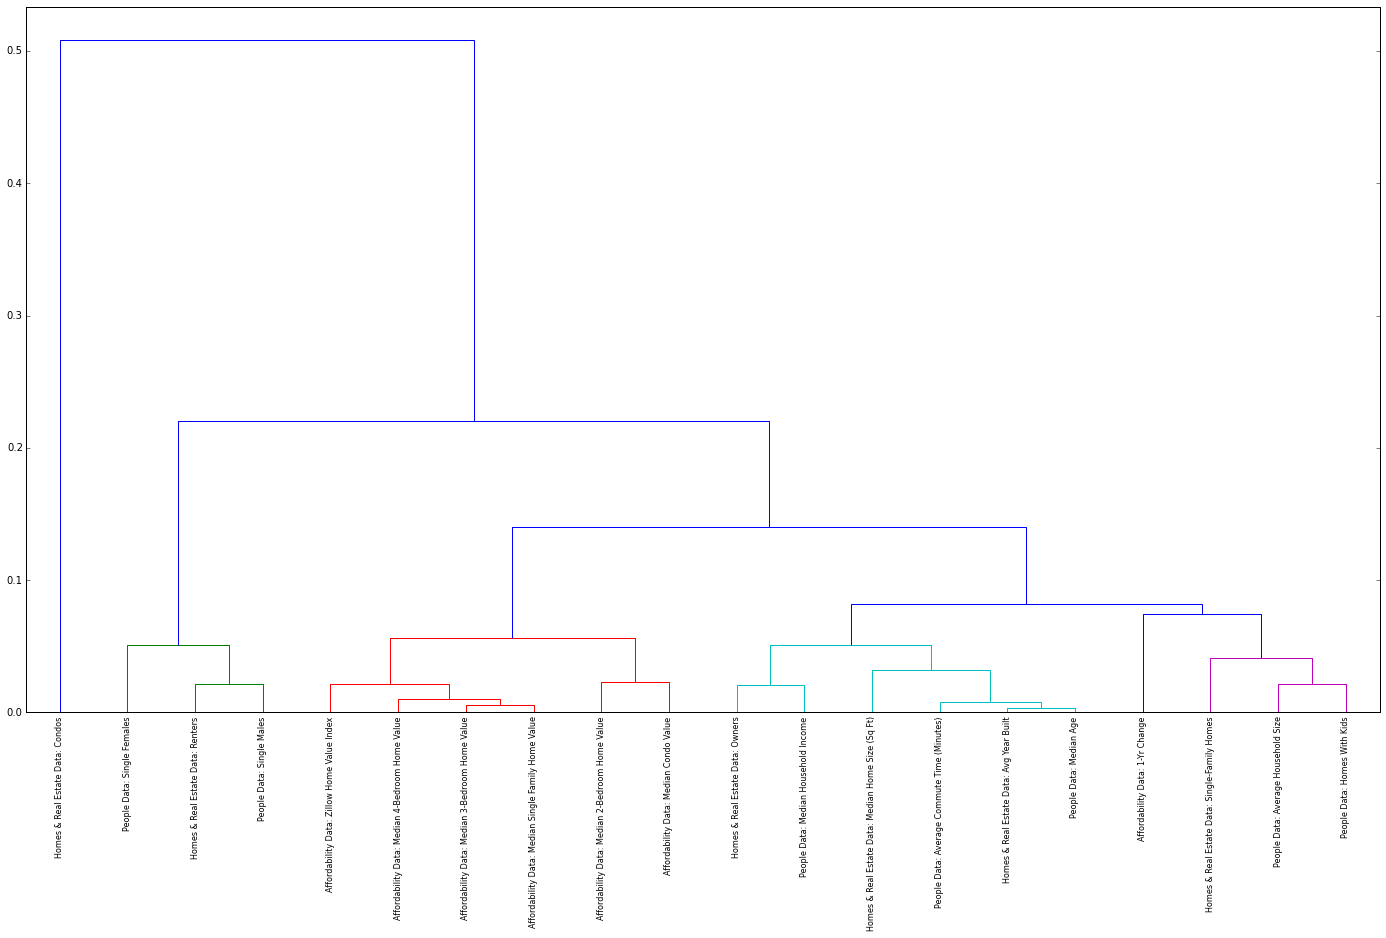

In [558]:
link = linkage(dff.T,method='complete', metric = 'cosine')

# 5. Using scipy's dendrogram function plot the linkages as
# a hierachical tree.
plt.figure(figsize=(20,20))
dendro = dendrogram(link, color_threshold=0.06, leaf_rotation = 90, leaf_font_size=8, labels = dff.columns )
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
plt.show()